# When to use what on hypothesis testing central limit

In [13]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import random
import math

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

The $z$-test can only be used under specific conditions:

- The sample needs to be random  
- The sample size needs to be sufficiently large ($n \geq 30$)
- The test statistic needs to have a normal distribution  
- The standard deviation of the population, $\sigma$, is known 

Sometimes these assumptions will not hold and in this case we can not use the $z$-test! If the variable is normally distributed, you can use Student's $t$-test.
 

## Left tailed Z test

**Step 1.** Formulate the hypotheses:

- $H_0: \mu$ = {current mean value}(value is not lower)
- $H_1: \mu$ < {current mean value}(value is lower)

**Step 2.** Choose a significance level, e.g. $\alpha = 0.05$

**Step 3.** Determine the value of the test statistic, in this case $\overline{x}$ = {mean of the sample} 

**Step 4.** Determine the $p$-value and reject $H_0$ if $p < \alpha$.

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/recruten.csv',
    sep=";", decimal=",")

# Set variables
alpha = 0.05 # Significance level chosen by the researcher
mu = 69 # (Hypothetical) population mean 
n = df['Height'].count() 
m_sample = df['Height'].mean()
s_sample = df['Height'].std() / np.sqrt(n)

In [15]:
# Determine P-value

# p = stats.norm.cdf(m_sample, loc=mu, scale=s_sample)
p = stats.t.cdf(m_sample, loc=mu, scale=s_sample, df=n-1) 

print("p-value: %.6f" % p)
if(p < alpha):
    print("p < alpha: reject H0")
else:
    print("p > alpha: do not reject H0")  

p-value: 0.999983
p > alpha: do not reject H0


In [16]:
# Critical value according to the formula:
#    g = mu + stats.norm.isf(alpha) * sigma / np.sqrt(n)
# Making use of the loc/scale parameters of isf:

#g = stats.norm.isf(1-alpha, loc=mu, scale=s_sample / np.sqrt(n))
g = stats.t.isf(1- alpha, loc=mu, scale=s_sample, df=n-1)

print("Critical value g ≃ %.3f" % g)
if (m_sample > g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (m_sample, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (m_sample, g))

Critical value g ≃ 68.370
sample mean = 70.683 < g = 68.370: do not reject H0


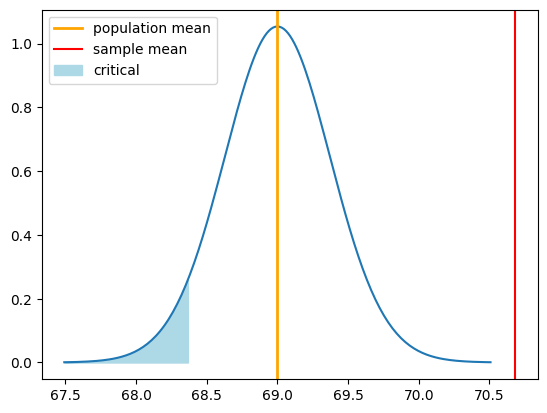

In [17]:
# Gauss-curve plot:
# X-values
dist_x = np.linspace(mu - 4 * s_sample, mu + 4 * s_sample, num=201)
# Y-values for the Gauss curve
dist_y = stats.t.pdf(dist_x, loc=mu, scale=s_sample, df=n-1)
fig, dplot = plt.subplots(1, 1)
# Plot the Gauss-curve
dplot.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
dplot.axvline(mu, color="orange", lw=2, label='population mean')
# Show the sample mean with a red line
dplot.axvline(m_sample, color="red", label='sample mean')
# Fill the acceptance area in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x <= g, color='lightblue', label='critical')
plt.legend()
plt.show()

## Right tailed Z test

**Step 1.** Formulate the hypotheses:

- $H_0: \mu$ = {current mean value}(value is not higher)
- $H_1: \mu$ > {current mean value}(value is higher)

**Step 2.** Choose a significance level, e.g. $\alpha = 0.05$

**Step 3.** Determine the value of the test statistic, in this case $\overline{x}$ = {mean of the sample} 

**Step 4.** Determine the $p$-value and reject $H_0$ if $p < \alpha$.


In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/recruten.csv',
    sep=";", decimal=",")

# Set variables
alpha = 0.05 # Significance level chosen by the researcher
mu = 69 # (Hypothetical) population mean 
n = df['Height'].count() 
m_sample = df['Height'].mean()
s_sample = df['Height'].std() / np.sqrt(n)

In [24]:
# Determine P-value

p = stats.t.sf(m_sample, loc=mu, scale=s_sample, df=n-1)
# p = stats.norm.sf(m_sample, loc=mu, scale=s_sample)

print("p-value: %.6f" % p)
if(p < alpha):
    print("p < alpha: reject H0")
else:
    print("p > alpha: do not reject H0")  

p-value: 0.000017
p < alpha: reject H0


In [20]:
# Critical value according to the formula:
#    g = mu + stats.norm.isf(alpha) * sigma / np.sqrt(n)
# Making use of the loc/scale parameters of isf:

#g = stats.norm.isf(alpha, loc=mu, scale=s_sample / np.sqrt(n))
g = stats.t.isf(alpha, loc=mu, scale=s_sample, df=n-1)

print("Critical value g ≃ %.3f" % g)
if (m_sample < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (m_sample, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (m_sample, g))

Critical value g ≃ 69.630
sample mean = 70.683 > g = 69.630: reject H0


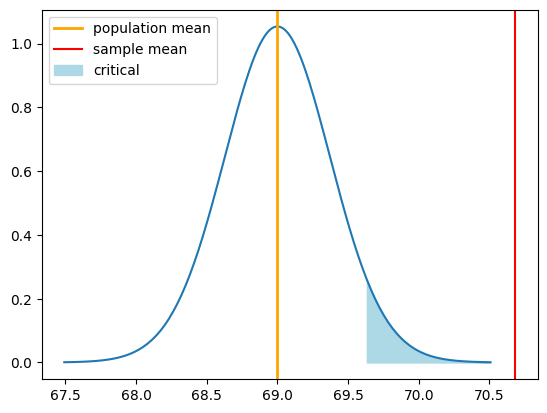

In [21]:
# Gauss-curve plot:
# X-values
dist_x = np.linspace(mu - 4 * s_sample, mu + 4 * s_sample, num=201)
# Y-values for the Gauss curve
dist_y = stats.t.pdf(dist_x, loc=mu, scale=s_sample, df=n-1)
fig, dplot = plt.subplots(1, 1)
# Plot the Gauss-curve
dplot.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
dplot.axvline(mu, color="orange", lw=2, label='population mean')
# Show the sample mean with a red line
dplot.axvline(m_sample, color="red", label='sample mean')
# Fill the acceptance area in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x >= g, color='lightblue', label='critical')
plt.legend()
plt.show()

Conclusion:
- Reject H0 because the sample mean is bigger than the critical value

## Two tailed Z test

In [39]:
# Determine p-value == devide alpha by 2
p = stats.t.sf(m_sample, loc=mu, scale=s_sample, df=n-1)

print("p-waarde: %.5f" % p)

if(p < alpha/2):
    print("p < alpha/2, reject H0")
else:
    print("p > alpha/2, do not reject H0")

p-waarde: 0.00002
p < alpha/2, reject H0


In [42]:
g1 = mu - stats.t.isf(alpha/2, df=n-1 ) * s_sample
g2 = mu + stats.t.isf(alpha/2, df=n-1) * s_sample
g = stats.t.isf(alpha, loc=mu, scale=s_sample, df=n-1)
print("Acceptance region [g1, g2] ≃ [%.3f, %.3f]" % (g1,g2))
if (g1 < m_sample and m_sample < g2):
    print("Sample mean = %.3f is inside acceptance region: do not reject H0" % m_sample)
else:
    print("Sample mean = %.3f is outside acceptance region: reject H0" % m_sample)

Acceptance region [g1, g2] ≃ [68.246, 69.754]
Sample mean = 70.683 is outside acceptance region: reject H0


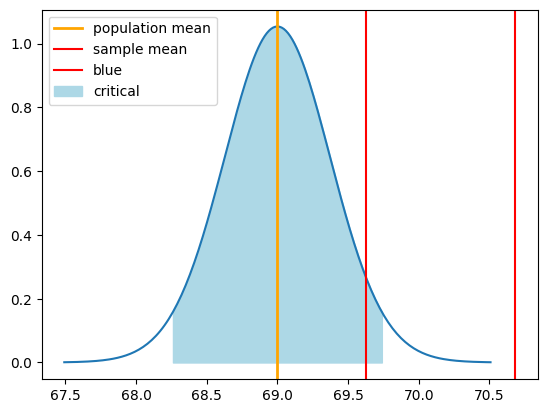

In [43]:
# Gauss-curve plot:
# X-values
dist_x = np.linspace(mu - 4 * s_sample, mu + 4 * s_sample, num=201)
# Y-values for the Gauss curve
dist_y = stats.t.pdf(dist_x, loc=mu, scale=s_sample, df=n-1)
fig, dplot = plt.subplots(1, 1)
# Plot the Gauss-curve
dplot.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
dplot.axvline(mu, color="orange", lw=2, label='population mean')
# Show the sample mean with a red line
dplot.axvline(m_sample, color="red", label='sample mean')
dplot.axvline(g, color="red", label='blue')
# Fill the acceptance area in light blue
dplot.fill_between(dist_x, 0, dist_y, where=(dist_x >= g1) & (dist_x <= g2), color='lightblue', label='critical')
plt.legend()
plt.show()